In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import column, Integer, String, Float
import pandas as pd

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Use the session to query Station table and display the first 5 locations
for row in session.query(Measurement, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x0000027142D52E80>, 'USC00519397', '2010-01-01', 0.08, 65.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000027142D52F40>, 'USC00519397', '2010-01-02', 0.0, 63.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000027142D52FD0>, 'USC00519397', '2010-01-03', 0.0, 74.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000027142D68040>, 'USC00519397', '2010-01-04', 0.0, 76.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000027142D680D0>, 'USC00519397', '2010-01-06', None, 73.0)


In [10]:
# Use the session to query Measurement table and display the first 5 locations
for row in session.query(Station, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation ).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x0000027142D77790>, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(<sqlalchemy.ext.automap.station object at 0x0000027142D77880>, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(<sqlalchemy.ext.automap.station object at 0x0000027142D778E0>, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(<sqlalchemy.ext.automap.station object at 0x0000027142D77940>, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(<sqlalchemy.ext.automap.station object at 0x0000027142D779A0>, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# print(recent_date)

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >'2016-08-23', Measurement.date <'2017-08-23').order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).statement
prcp_df = pd.read_sql_query(results, session.bind)
prcp_df.count()

date    19550
prcp    18103
dtype: int64

In [13]:
# Get rid of NaN data
prcp2_df = prcp_df.dropna()

In [14]:
# Sort the dataframe by date
prcp2_df.sort_values("date", ascending = True)

,date,prcp
0,2010-01-01,0.08
9518,2010-01-01,0.15
2724,2010-01-01,0.28
14959,2010-01-01,0.05
16938,2010-01-01,0.14
...,...,...
2722,2017-08-22,0.00
12186,2017-08-23,0.08
7634,2017-08-23,0.00
2723,2017-08-23,0.00


Text(0.5, 1.0, 'Precipitation')

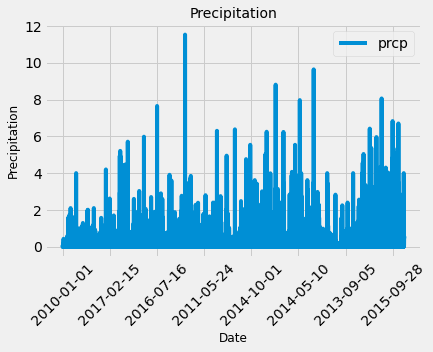

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp2_df.set_index('date').plot(rot=45)
plt.xlabel("Date",size=12)
plt.ylabel("Precipitation",size=12)
plt.title("Precipitation", size=14)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp2_df.describe(include='all')

,date,prcp
count,18103,18103.000000
unique,2792,NaN
top,2010-06-25,NaN
freq,9,NaN
mean,NaN,0.160644
std,NaN,0.468746
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.010000
75%,NaN,0.110000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()